### PCA
- 데이터 간 변이 규칙을 찾아낼 때 PCA 사용
- 주성분 분석
    - 낮은 차원의 데이터 값 변화가 높은 차원의 데이터 변이 설명 가능

- 붓꽃 데이터의 차원 축소
    - 꽃받침 길이와 꽃받침 폭의 연관 관계

In [27]:
from sklearn.datasets import load_iris
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk

# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [28]:
iris = load_iris()
N = 10
X = iris.data[:N, :2]

In [29]:
plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0,5, 2)
plt.ylim(3.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

In [30]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s = 100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원표시)")
plt.axis("equal")
plt.show()

- 잠재변수 : 측정되지는 않지만 데이터의 기저에 숨어 측정 데이터를 결정짓는 데이터
- PCA에서는 잠재변수와 측정 데이터가 선형적으로 연결되어 있다 가정.
- 잠재변수를 찾을 수 있다고 가정. 선형조합해서..
- 가중치를 적용하여 잠재변수를 찾는다.
- 고차원의 데이터를 저차원으로 축소하여 잠재변수를 발견

### 차원축소와 투영
- 다차원 벡터를 더 낮은 차원의 벡터 공간 투영으로 고려
- low rank approximation problem
- 

### PCA의 수학적 설명
- 변환행렬을 곱하여 원 데이터와 투영 데이터의 차이를 줄이는 평면을 찾는다.

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

In [14]:
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i,1], X2[i, 1]], "k--")

In [15]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

In [16]:
pca1.mean_

array([4.86, 3.31])

In [17]:
pca1.components_

array([[0.68305029, 0.73037134]])

In [18]:
X0 = X - X.mean(axis=0)
U,S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [19]:
VT[:, 0]

array([-0.68305029, -0.73037134])

In [20]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [21]:
W, V

(array([0.17107711, 1.44192289]), array([[-0.73037134, -0.68305029],
        [ 0.68305029, -0.73037134]]))

In [22]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [23]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == k]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)
X32

array([[0.3171423 , 0.36583173, 0.4889732 , ..., 0.21402764, 0.23132566,
        0.25146037],
       [0.4152275 , 0.4728365 , 0.5534038 , ..., 0.13634998, 0.15757832,
        0.1756149 ],
       [0.5833547 , 0.63496614, 0.65530944, ..., 0.02706685, 0.05827982,
        0.08303928],
       ...,
       [0.32937974, 0.40658554, 0.5079987 , ..., 0.17361505, 0.18722248,
        0.19381067],
       [0.07399759, 0.12307164, 0.33827448, ..., 0.3813649 , 0.38548785,
        0.39991832],
       [0.34837958, 0.46845227, 0.53697336, ..., 0.1124485 , 0.12054069,
        0.10677893]], dtype=float32)

In [24]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

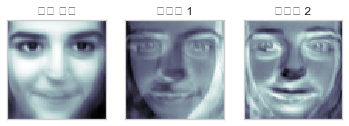

In [40]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

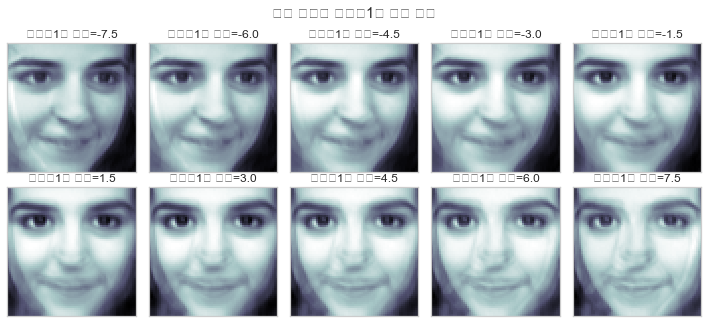

In [41]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()

In [26]:
import matplotlib
[f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith("N")]

['Nanum Pen Script',
 'NewJumja',
 'NanumSquareRound',
 'Nirmala UI',
 'NanumGothic',
 'New Gulim',
 'NanumMyeongjo',
 'Nanum Brush Script',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumGothic',
 'Niagara Solid',
 'NanumGothic',
 'Nirmala UI',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumSquare',
 'Nirmala UI',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumSquareRound',
 'Niagara Engraved']

In [31]:
xx = np.linspace(-10, 10, 100)

In [34]:
plt.plot(xx, np.maximum(xx, 0))
plt.title("max(x,0) 또는 ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

In [35]:
np.e

2.718281828459045

In [36]:
np.exp(-10), np.exp(-1), np.exp(-0.1), np.exp(0), np.exp(0.1), np.exp(1), np.exp(10)

(4.5399929762484854e-05,
 0.36787944117144233,
 0.9048374180359595,
 1.0,
 1.1051709180756477,
 2.718281828459045,
 22026.465794806718)

In [37]:
xx = np.linspace(-2, 2, 100)
yy = np.exp(xx)
plt.title("지수함수")
plt.plot(xx, yy)
plt.axhline(1, c='r', ls="--")
plt.axhline(0, c='r', ls="--")
plt.axvline(0, c='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$\exp(x)$")
plt.show()

In [38]:
np.exp(2 + 3), np.exp(2) * np.exp(3)

(148.4131591025766, 148.4131591025766)

In [39]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [41]:
np.log(20)

2.995732273553991

In [42]:
xx = np.linspace(0.01, 8, 100)
yy = np.log(xx)